In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DiabetesChallenge/subsampled_E10-E14.csv')

In [ ]:
df = df.fillna(0)
df.loc[df['sex'] == 'F', 'sex'] = 2
df.loc[df['sex'] == 'M', 'sex'] = 1
df.loc[df['sex'] == 'U', 'sex'] = 3


In [ ]:
df = df.drop(columns = ['p_id', 'v_o_id', 'stratification'], axis= 1)

In [ ]:
df

,age,sex,K73,H35,I65,J45,F30-F39,E66,I10-I15,E78,...,C62,C40-C41,C53,Z89,C43,C46,C56,C73,pred1y_E10-E14,years_with_diabetes
0,77,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,63,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,49,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,52,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,78,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,74,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
39996,65,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
39997,66,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
39998,72,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
X = np.array(df)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

In [ ]:
# Calcular la inercia (suma de los cuadrados de las distancias dentro de los clusters)
inertia = kmeans.inertia_

# Calcular el log likelihood aproximado
n_samples, n_features = X.shape
log_likelihood = -0.5 * inertia

# Calcular el número de parámetros
# Para KMeans, el número de parámetros es el número de clusters * número de características
n_params = kmeans.n_clusters * n_features

# Calcular el AIC
aic = 2 * n_params - 2 * log_likelihood

print(f'AIC: {aic}')

AIC: 2323491.501305718


In [ ]:
clusters = {}
aic_lista = []
bic_lista = []
for i in range(2, 51):
  kmeans = KMeans(n_clusters= i, random_state=0, n_init="auto").fit(X)
  clusters[i] = kmeans

  inertia = kmeans.inertia_

  # #########Calcular el log likelihood aproximado
  n_samples, n_features = X.shape
  log_likelihood = -0.5 * inertia

  # Calcular el número de parámetros
  # Para KMeans, el número de parámetros es el número de clusters * número de características
  n_params = kmeans.n_clusters * n_features

  # Calcular el AIC
  aic = 2 * n_params - 2 * log_likelihood

  aic_lista.append(aic)
  ################
  bic = np.log(n_samples) * n_params - 2 * log_likelihood
  bic_lista.append(bic)
    #kmeans.cluster_centers_


In [ ]:
aic_lista

[2323491.501305718,
 1279794.8469124143,
 800974.5422049786,
 668393.2970876667,
 482726.2652297802,
 376974.61521799397,
 320752.75776435167,
 297780.8706657998,
 276694.0538079151,
 239046.0664342632,
 224640.90663578862,
 215132.745349381,
 191779.95690637163,
 170852.40566454263,
 160851.2134127674,
 156232.195150063,
 149884.52484980482,
 146921.06555905685,
 142554.69298060727,
 144694.33489768865,
 136747.3847104853,
 135619.66656788933,
 133183.90839187108,
 132794.4238587519,
 131248.4663680835,
 130878.04789046629,
 124528.96646566117,
 124270.75240191157,
 124009.00940122815,
 122864.65705346757,
 122424.27602772572,
 122058.00929519554,
 121182.64858694992,
 120246.09865205274,
 118772.54906728285,
 117428.16962974894,
 116913.18040254606,
 116454.01920563482,
 116251.24241659667,
 115773.44306546528,
 115481.66546334414,
 115295.9141833117,
 114965.72443494192,
 114389.21951839174,
 114227.49022733947,
 113398.61641268176,
 112839.23595891695,
 112910.58760399689,
 112760.

In [ ]:
min(aic_lista)

112760.70851028271

In [ ]:
bic_lista

[2324987.315749277,
 1282038.5685777524,
 803966.1710920961,
 672132.8331965635,
 487213.7085604564,
 382209.9657704495,
 326736.01553858654,
 304512.03566181404,
 284173.1260257087,
 247273.04587383615,
 233615.79329714092,
 224855.53923251267,
 202250.65801128265,
 182071.01399123302,
 172817.72896123712,
 168946.6179203121,
 163346.85484183326,
 161131.30277286464,
 157512.83741619444,
 160400.3865550552,
 153201.34358963117,
 152821.5326688146,
 151133.68171457568,
 151492.10440323583,
 150694.0541343468,
 151071.54287850898,
 145470.36867548322,
 145960.06183351297,
 146446.2260546089,
 146049.78092862768,
 146357.30712466518,
 146738.94761391438,
 146611.4941274481,
 146422.85141433027,
 145697.20905133974,
 145100.7368355852,
 145333.65483016166,
 145622.4008550298,
 146167.531287771,
 146437.63915841898,
 146893.76877807718,
 147455.9247198241,
 147873.64219323368,
 148045.04449846287,
 148631.22242918995,
 148550.2558363116,
 148738.78260432614,
 149558.04147118545,
 150156.06

In [ ]:
min(bic_lista)

145100.7368355852

In [ ]:
import matplotlib.pyplot as plt

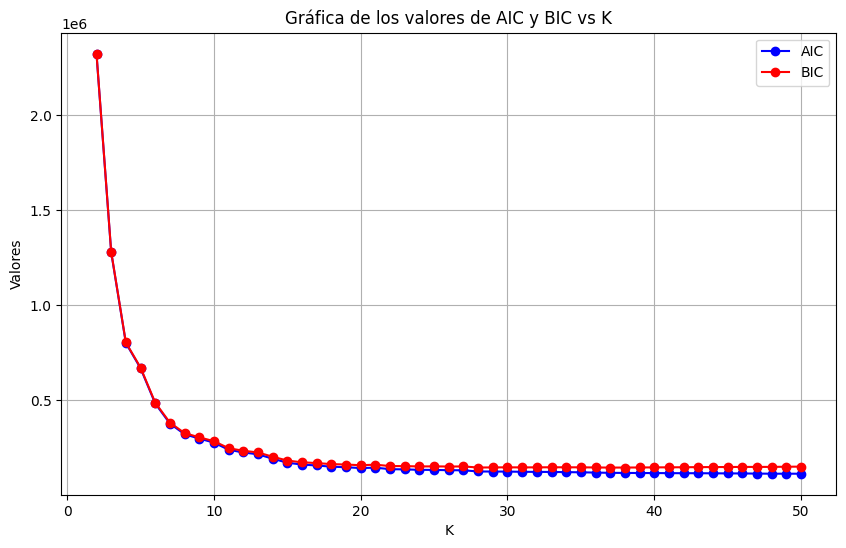

In [ ]:
# Generar los valores de x
x = list(range(2, 51))

# Crear la gráfica

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar AIC
plt.plot(x, aic_lista, marker='o', linestyle='-', color='b', label='AIC')

# Graficar BIC
plt.plot(x, bic_lista, marker='o', linestyle='-', color='r', label='BIC')

# Agregar títulos y etiquetas
plt.title('Gráfica de los valores de AIC y BIC vs K')
plt.xlabel('K')
plt.ylabel('Valores')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [ ]:
indice = 2
for i in bic_lista:
  if i == 145100.7368355852:
    print(indice, i )
  indice = indice + 1


37 145100.7368355852
